# 핸즈온 사전 단계

- 이벤트 엔진, Cloud Formation 이용: 
    - [핸즈온 준비 필수 단게: Prerequisite](0.0.Prerequisite/CF-Prerequisite.md)
- 이벤트 엔진, 수동 설정: 
    - 이벤트 엔진으로 시작을 안 한다고 하면, 이 과정은 생략하세요.
    - [여기](0.0.Prerequisite/Prerequisite.md) 를 클릭해서 해주세요.
- SageMaker notebook instance 를 이미 가지고 있는 경우
    - SageMaker notebook instance를 실행하는 Role이 아래 4개의 권한을 꼭 가지고 있어야 합니다. 아래 권한을 추가 해주세요. 참고로 위의 수동 설정에는 아래 4가지 권한을 추가하는 과정이 있습니다. 참고 하세요. (AmazonSageMakerFullAccess, AmazonS3FullAccess, AmazonPersonalizeFullAccess, IAMFullAccess)

## Personalize 워크샵의 목적
**아래와 같은 호기심을 충족을 목적으로 합니다.**

- 유저의 상호작용 (영화 보기)에 따른 실시간 추천의 변화
    - 훈련에 사용된 유저의 이력을 확인하고, 첫 번째 추천을 받습니다. 이후에 이벤트 추적기를 사용하여 두 번째, 세 번째, 네 번째 추천을 받습니다. 어떻게 유저의 상호작용에 따라 실시간 추천의 변화가 발생하는지를 확인 합니다. 예시로써 Thriller, Sci-Fic 영화를 과거에 주로 봤고, Documentary 영화를 세번 상호 작용한 후에 추천 리스트가 바뀌는 것을 확인 할 수 있음.


- 유저 개인별 추천 분석
    - **캠페인을 통해서 추천 결과가 나오면, 어떻게 해서 이런 추천 결과가 나올까 라는 호기심이 생깁니다.** 이런 호기심을 충족하기 위해서, (1) 학습 데이터 셋에서의 최근 인터랙션의 영화 리스트를 확인하고, (2) 검증 데이터 셋의 리스트를 확인 합니다. 이후 (3) 캠페인을 통한 추천 결과 리스트를 확인 합니다. (3)의 추천 결과는 (1) 의 기반 위에서 나온 겻을 확인할 수 있고, (3) 과 (2)를 비교하여 추천 정확도를 확인 합니다.


- 캠페인을 통한 Validation(검증) 데이터 셋과 과 솔류션 버전의 지표 분석 (전체 6040명) 
    - **실제로 캠페인을 통한 추천의 성능이 얼마나 잘 되었는지를 확인 합니다.**
    - 또한 이 결과를 이전에 솔류션 버전에서 생성된 성능 지표와 비교 합니다.


- ColdStart Campaign 성능 분석
    - **"ColdStart 의 성능이 정말 잘 나올까?"** 라는 호기심이 생깁니다. 1853개의 ColdStart의 아이템에서 랜덤으로 선택한 리스트와 ColdStart Campaign의 결과를 비교 합니다.


- ColdStart Campaign 의 추천 결과 유추
    - **추천 결과를 받았습니다. 그런데 어떻게 추천을 하지 라는 호기심이 생깁니다.** 결론적으로 학습에 사용된 item의 장르에 기반해서 ColdStart 추천을 받은 것을 확인할 수 있습니다.
    
## Personalize 구조 및 워크샵에서 만들어지는 것들 
아래의 그림 처럼, Personalize의 구조 입니다. 이 구조를 노트북을 한개씩 실행해 가면서 레고블럭처럼 만들게 됩니다.

![Fig.2.1.dataset-group-structure](movielens_getting_started/static/imgs/Fig.2.1.dataset-group-structure.png)

## 워크샵 실행에 따른 결과물
- 유저당 영화 추천 리스트, 특정 영화와 비슷한 영화 리스트 추천
- 실시간 영화 선택에 따른 추천 리스트의 변화 시뮬레이션
- Batch Export (모든 영화 유저에 대해서 일과적으로 모든 추천 리스트 제공)
- **특정 유저의 추런 결과 분석**
    - 과거 최근 영화 리스트 (학습 데이터)에 기반한 추천 리스트의 비교를 통해서 직관적으로 어떻게 추천을 했는지 확인 및 얼마나 정확하게 추천 했는지를 확인 함
- 만들어진 캠패인을 통해서 추천 받은 리스트가 얼마나 정확한지 확인. <br>**추천 리스트와 검증 셋을 비교하여 성능 지표 산출 (전체 6040명)**
- Coldstart(신상품)의 성능을 랜덤으로 추천시와 비교하여 성능 확인
- **특정 유저에게 Coldstart로 추천 받은 리스트에 대해서, 왜 이런 리스트를 추천했는지를 유추**



## 노트북 설명
* 1.1.Prepare_Data_Files.ipynb
    - Movielens 데이타를 다운로드 받고, 전체 데이타의 분포를 확인 한 후에 데이터를 학습/검증, 콜드스타트 용으로 3가지의 데이타로 분리 합니다.
- 1.2.Option-Train-Data-Distritbution.ipynb
    - 학습/검증 데이터의 인터렉션의 통계 및 분포를 확인
- 2.1.Create-Dataset-Group.ipynb    
    - Dataset Group, Schema, Data Set, Data Import의 작업을 수행 합니다.
- 3.1.Create_Solutions_Versons.ipynb
    - Personalize가 제공하는 7가지의 솔류션 버전을 생성 합니다.
        - **User-Personalization (최신 2020.8에 출시된 레서피)**
        - HRNN
        - HRNN Coldstart
        - HRNN-Metadata
        - popularity-count 
        - SIMS
        - Personalized Ranking
- 3.2.Evaluate_Solutions_Versions.ipynb        
    - 위에서 생성한 7가지의 솔류션 버전 성능 지표를 비교 (참고로 User-Personalization 가 제일 잘 나왔습니다.)
- 4.1.Create_Campaigns.ipynb    
    - 7가지의 솔류션 버전 중에서 아래 5개만 캠페인 생성 (계정당 기본 캠페인의 Limit이 5 이기에 5개만 생성 함)
        - user-personalization
        - HRNN
        - HRNN-Meta
        - HRNN-Coldstart
        - SIMS
- 4.2.getRec_Campaigns.ipynb        
    - user-personalization 로 만든 캠페인을 이용하여 특정 유저의 추천 리스트 생성 및 SIMS로 만든 캠페인을 통한 특정 아이템에 대한 유사한 추천 아이템 리스트를 생성
- 4.3.Create_EventTracker.ipynb    
    - 실시간 추적기를 생성하여 실시간으로 첫 번째 영화 선택, 두 번 째 영황 선택에 따른 추천 리스트 변화를 시뮬레이션 합니다.
- 4.4.Experiment_Realtime_Rec.ipynb
    - 훈련에 사용된 유저의 이력을 확인하고, 첫 번째 추천을 받습니다. 이후에 이벤트 추적기를 사용하여 두 번째, 세 번째, 네 번째 추천을 받습니다. 어떻게 유저의 상호작용에 따라 추천의 변화가 발생하는지를 확인 합니다.
- 5.1.Create_Batch_Export.ipynb    
    - Batch Export를 생성 합니다. 즉 모든 유저에 대해서 일괄적으로 추천 리스트를 생성하여 S3에 저장 합니다.
- 6.1.Evaluate_Analyse.ipynb
    - 특정 유저 추천 분석
    - 캠페인을 통한 전체 유저(6040명)의 추천 리스트와 검증 셋과 비교를 통한 성능 지표 확인
    - 콜드 스타트와 랜덤으로 추천을 비교하여 성능 확인 
    - 콜드 스타트의 추천 리스트 유추 분석
- 9.1.Cleanup.ipynb
    - 모든 리소스 제거 노트북
    



---
## 참고:
- Amazon Personalize Developer Guide
    - 공식 개발 문서 가이드 입니다.
    - https://docs.aws.amazon.com/personalize/latest/dg/what-is-personalize.html


- Amazon Personalize Samples
    - 공식 에제 Git 저장소 입니다.
    - https://github.com/aws-samples/amazon-personalize-samples



- Recent Blog: Amazon Personalize can now create up to 50% better recommendations for fast changing catalogs of new products and fresh content    
    - 최신 나온 user-personalization 블로그 입니다. 뉴스 기사 같은 상품처럼 시간이 지나면 급속하게 인기가 떨어지는 대한 사례로 사용하기 좋습니다.
    - https://aws.amazon.com/blogs/machine-learning/amazon-personalize-can-now-create-up-to-50-better-recommendations-for-fast-changing-catalogs-of-new-products-and-fresh-content/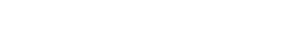
    
    
- Amazon researchers win best-paper award at KDD
    - 최근 위에 나온 블로그에 나온 레서피(user-personalization)에 대한 논문 발표 내용 입니다.
    - https://www.amazon.science/blog/amazon-researchers-win-best-paper-award-at-kdd